In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

In [23]:
df = pd.read_csv('house_data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [25]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [26]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [27]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1306,), dtype=object)

In [28]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [29]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      shape=(2689,), dtype=object)

In [30]:
df = df.drop(['area_type','availability','balcony','society'],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [32]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [33]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [34]:
df['location']= df['location'].fillna('Sarjapur  Road')
df.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [35]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [36]:
df['size']=df['size'].fillna("2 BHK")
df['size'].isnull().sum()


np.int64(0)

In [37]:
df['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [38]:
med_bath=df["bath"].median()
med_bath
df['bath']=df['bath'].fillna(med_bath)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [40]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12438 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12438 non-null  object 
 1   size        12438 non-null  object 
 2   total_sqft  12438 non-null  object 
 3   bath        12438 non-null  float64
 4   price       12438 non-null  float64
dtypes: float64(2), object(3)
memory usage: 583.0+ KB


In [41]:
df["location"].value_counts()
loc = df["location"].value_counts()
loc_less_than_10 = loc[loc<=10]

df["location"] = df["location"].apply(lambda x: "others" if x in loc_less_than_10 else x)
df["location"].value_counts()

location
others                  2941
Whitefield               507
Sarjapur  Road           365
Electronic City          273
Thanisandra              224
                        ... 
Tindlu                    11
Thyagaraja Nagar          11
Banashankari Stage V      11
HAL 2nd Stage             11
NGR Layout                11
Name: count, Length: 232, dtype: int64

In [42]:
#Handling size column
out = [int(i.split()[0]) for i in df["size"]]
df["bhk"] = out
df

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,others,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2


In [43]:
#Handling total_sqft column
def clean_sqft(sqft):     
    l = sqft.split("-")
    if len(l)==2:
        return float(l[0])+float(l[1])/2
    try:
       return float(l[0]) 
    except:
        return None
df["total_sqft"] = df["total_sqft"].apply(clean_sqft)

df["total_sqft"] = df["total_sqft"].fillna(round(df["total_sqft"].mean()))

In [44]:
#create price_per_sqft
# formula:   price/total_sqft
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136


In [45]:
#handling outliers in total_sqft

# total_sqft/bhk>=300--> # to keep only realistic rows where the total square footage is at least 300 sq ft per BHK.

df = df[df["total_sqft"]/df["bhk"]>=300]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000
mean,1628.246502,2.579667,114.455648,2.666809,6377.474059
std,1313.481400,1.099383,156.421987,0.995743,4291.202802
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1124.000000,2.000000,50.000000,2.000000,4207.119741
50%,1320.000000,2.000000,71.000000,3.000000,5326.086957
75%,1735.000000,3.000000,120.000000,3.000000,6989.247312
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [46]:
#Handling outliers in bhk
df = df[df["bhk"]<=6]

In [47]:
#Handling outliers in bath column
# bhk+2

# It removes unrealistic rows where the number of bathrooms 
# (bath) is suspiciously high compared to the number of bedrooms (bhk).

df = df[df["bath"]<df["bhk"]+2]
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,others,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136


<Axes: xlabel='price_per_sqft'>

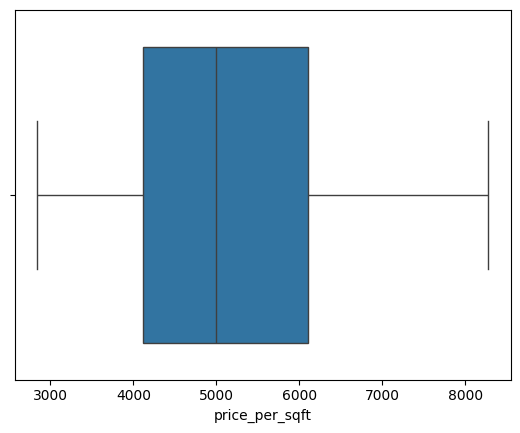

In [48]:
#Handling outliers in price per sqft
# sns.boxplot(x="price_per_sqft",data=df)
#IQR Method --> 
q1 = df["price_per_sqft"].quantile(0.25)
q3 = df["price_per_sqft"].quantile(0.75)

IQR = q3-q1

lower = q1-0.5*IQR
upper = q3+0.5*IQR

df = df[(df["price_per_sqft"]>=lower) & (df["price_per_sqft"]<=upper)]
sns.boxplot(x="price_per_sqft",data=df)

In [49]:
df.reset_index(inplace=True)
df = df.drop(["index","size","price_per_sqft"],axis=1)
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
9429,Rachenahalli,1050.0,2.0,52.71,2
9430,Bellandur,1262.0,2.0,47.00,2
9431,Green Glen Layout,1715.0,3.0,112.00,3
9432,Whitefield,3453.0,4.0,231.00,5


In [50]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,Normalizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error

In [51]:
encoder = LabelEncoder()
df["encoded_loc"] = encoder.fit_transform(df["location"])
df.head()

,location,total_sqft,bath,price,bhk,encoded_loc
0,Electronic City Phase II,1056.0,2.0,39.07,2,75
1,Chikka Tirupathi,2600.0,5.0,120.00,4,58
2,Uttarahalli,1440.0,2.0,62.00,3,216
3,Lingadheeranahalli,1521.0,3.0,95.00,3,154
4,Kothanur,1200.0,2.0,51.00,2,146


In [52]:
#Divide into input and Output
X = df.drop(["location","price"],axis=1)
y = df.price

In [53]:
#split the data into training and testing data
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
#model training 
model = RandomForestRegressor(random_state=42)
params = {
    "n_estimators":[100,150,200,250,300],
    "max_depth":[3,4,5,6,7]
}

grid = GridSearchCV(estimator=model,param_grid=params,cv=5)

grid.fit(Xtrain,ytrain)

print("Best params: ",grid.best_params_)
print("Best Score: ",grid.best_score_)

Best params:  {'max_depth': 7, 'n_estimators': 100}
Best Score:  0.8381037294017915


In [55]:
ypred = grid.predict(Xtest)
ypred

array([81.57396001, 62.35419739, 51.83753994, ..., 88.12097952,
       87.48294424, 45.94558575], shape=(2831,))

In [56]:
print("Training Eff: ",grid.score(Xtrain,ytrain))
print("Testing Eff: ",grid.score(Xtest,ytest))

Training Eff:  0.8992170567275151
Testing Eff:  0.8097523813468984


In [57]:
print("R2: ",r2_score(ytest,ypred))
print("MAE: ",mean_absolute_error(ytest,ypred))

R2:  0.8097523813468984
MAE:  14.776959713193138


In [58]:
#Save cleaned dataset
df.to_csv("cleaned_df.csv")

In [59]:
#Save the model in pickle file
import pickle
with open("RF_model.pkl","wb") as file:
    pickle.dump(grid,file)